In [1]:
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sccoda.util import data_visualization as viz


2025-05-25 11:02:14.346568: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 11:02:14.388080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-25 11:02:14.388118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-25 11:02:14.389251: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-25 11:02:14.395630: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-25 11:02:14.396522: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
import os
out_folder = './output'
os.makedirs(out_folder, exist_ok=True)

In [3]:
# the following are needed to ensure that text in plt images opens as text box rather than glyphs in adobe
plt.rcParams['pdf.fonttype'] = 42  
plt.rcParams['ps.fonttype'] = 42   


In [4]:
!pwd

/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn-zeba-may25/xenium-cgn/notebooks/12_CellTypeProportions_BoxPlots


## AnnData Object with everything
Shared by Robin on 31 Oct Slack with me:
/data/projects/robin/segmentation/xenium_outs/adata_complete_reduced_withTransformedMC.h5ad
This is also the object that I have used for the Cellchat Analysis

In [5]:
#adata = sc.read_h5ad("/data/projects/robin/segmentation/xenium_outs/adata_complete_reduced_withTransformedMC.h5ad")
adata = sc.read_h5ad('/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn/notebooks_zs/02_PeriglomDefinition_Sample26updated/output_dataobjects/adata_complete_reduced_withTransformedMC_X26updated.h5ad')
adata

AnnData object with n_obs × n_vars = 3218210 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned', 'nichepca_glom_no', 'glom_ID', 'polygon_flags', 'is_in_polygon', 'is_in_glom', 'is_in_periglom', 'Slide_num'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'

In [6]:
rename_dict = {
    "Transformed mesangial": "Fibrotic MC",
    "mesangial cell": "MC",
}


adata.obs["celltype_l1"] = adata.obs["celltype_l1"].replace(rename_dict)


### Subset Cell within gloms

In [7]:
adata=adata[adata.obs['is_in_glom']==True]
adata

View of AnnData object with n_obs × n_vars = 169753 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch', 'Patient_Sample_ID', 'Disease', 'n_genes', 'celltype_l1', 'celltype_l1_codes', 'celltype_l1_prob', 'Biopsy_ID', 'sample', 'label', 'nichepca_domain', 'nichepca_domain_tuned', 'nichepca_glom_no', 'glom_ID', 'polygon_flags', 'is_in_polygon', 'is_in_glom', 'is_in_periglom', 'Slide_num'
    var: 'gene_ids', 'feature_types'
    uns: 'celltype_l1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'

In [8]:
adata.obs["Patient_Sample_ID"]

cell_CR4f0dee9aa-1601        X8_SLE
cell_CR4f0dee9aa-1632        X8_SLE
cell_CR4f0dee9aa-1642        X8_SLE
cell_CR4f0dee9aa-1668        X8_SLE
cell_CR4f0dee9aa-1670        X8_SLE
                             ...   
cell_CR4113b3b6d-450863    X63_ANCA
cell_CR4113b3b6d-451014    X58_ANCA
cell_CR4113b3b6d-451429    X63_ANCA
cell_CR4113b3b6d-451522    X63_ANCA
cell_CR4113b3b6d-451974    X60_ANCA
Name: Patient_Sample_ID, Length: 169753, dtype: category
Categories (59, object): ['X1_Cntrl', 'X2_Cntrl', 'X3_ANCA', 'X4_ANCA', ..., 'X60_ANCA', 'X61_SLE', 'X62_SLE', 'X63_ANCA']

In [9]:
df_sample_celltypes = adata.obs[["Patient_Sample_ID","celltype_l1"]]
df_sample_celltypes

,Patient_Sample_ID,celltype_l1
cell_CR4f0dee9aa-1601,X8_SLE,PT
cell_CR4f0dee9aa-1632,X8_SLE,EC
cell_CR4f0dee9aa-1642,X8_SLE,DTL
cell_CR4f0dee9aa-1668,X8_SLE,Fibrotic MC
cell_CR4f0dee9aa-1670,X8_SLE,DTL
...,...,...
cell_CR4113b3b6d-450863,X63_ANCA,PEC
cell_CR4113b3b6d-451014,X58_ANCA,MC
cell_CR4113b3b6d-451429,X63_ANCA,Fibrotic MC
cell_CR4113b3b6d-451522,X63_ANCA,Fibrotic MC


In [10]:
df_sampleXcelltypes = df_sample_celltypes.groupby(["Patient_Sample_ID","celltype_l1"]).size().reset_index(name='counts')
df_sampleXcelltypes

,Patient_Sample_ID,celltype_l1,counts
0,X1_Cntrl,podocyte,1974
1,X1_Cntrl,PEC,313
2,X1_Cntrl,MC,1253
3,X1_Cntrl,Fibrotic MC,33
4,X1_Cntrl,PapE,3
...,...,...,...
1765,X63_ANCA,MAST,11
1766,X63_ANCA,cDC,17
1767,X63_ANCA,pDC,2
1768,X63_ANCA,cycMNP,462


In [11]:
df_sampleXcelltypes = df_sampleXcelltypes.pivot(index= "Patient_Sample_ID", columns="celltype_l1", values="counts").fillna(0)
df_sampleXcelltypes = df_sampleXcelltypes.astype(int)

In [12]:
df_sampleXcelltypes["Patient_Sample_ID_col"]=df_sampleXcelltypes.index


In [13]:
df_sampleXcelltypes

celltype_l1,podocyte,PEC,MC,Fibrotic MC,PapE,VSM/P,EC,PT,ATL,CNT,...,N,MAC,MDC,Mono,MAST,cDC,pDC,cycMNP,cycNKC/T,Patient_Sample_ID_col
Patient_Sample_ID,,,,,,,,,,,,,,,,,,,,,
X1_Cntrl,1974,313,1253,33,3,105,2571,24,5,9,...,18,12,29,97,4,8,2,4,2,X1_Cntrl
X2_Cntrl,268,43,175,12,1,16,331,2,0,0,...,1,3,5,12,1,0,0,1,1,X2_Cntrl
X3_ANCA,365,233,73,70,2,20,306,9,0,0,...,8,30,25,30,1,0,0,9,0,X3_ANCA
X4_ANCA,254,27,158,26,1,71,661,4,0,1,...,12,6,6,10,1,0,0,4,1,X4_ANCA
X6_ANCA,209,38,36,2,0,17,244,1,1,0,...,1,1,0,0,0,0,0,0,0,X6_ANCA
X7_SLE,254,21,70,16,0,21,456,2,1,2,...,8,12,3,13,0,0,0,4,0,X7_SLE
X8_SLE,38,14,3,16,0,3,31,6,0,0,...,1,4,0,9,0,1,1,1,0,X8_SLE
X9_Cntrl,666,156,369,27,2,26,712,19,1,0,...,4,11,8,17,2,1,1,1,0,X9_Cntrl
X10_Cntrl,2412,594,1462,149,9,115,2956,133,14,11,...,26,31,22,52,5,7,2,5,0,X10_Cntrl


## Convert the df to a AnnData object

In [14]:
data_Xen = dat.from_pandas(df_sampleXcelltypes, covariate_columns=["Patient_Sample_ID_col"])


print(data_Xen.X)
print(data_Xen.obs)
data_Xen

[[1974  313 1253 ...    2    4    2]
 [ 268   43  175 ...    0    1    1]
 [ 365  233   73 ...    0    9    0]
 ...
 [ 159   24   75 ...    0    5    1]
 [ 239   51  211 ...    1    5    0]
 [1860 2146  548 ...    2  462   38]]
celltype_l1       Patient_Sample_ID_col
Patient_Sample_ID                      
X1_Cntrl                       X1_Cntrl
X2_Cntrl                       X2_Cntrl
X3_ANCA                         X3_ANCA
X4_ANCA                         X4_ANCA
X6_ANCA                         X6_ANCA
X7_SLE                           X7_SLE
X8_SLE                           X8_SLE
X9_Cntrl                       X9_Cntrl
X10_Cntrl                     X10_Cntrl
X12_ANCA                       X12_ANCA
X13_GBM                         X13_GBM
X14_ANCA                       X14_ANCA
X15_SLE                         X15_SLE
X16_SLE                         X16_SLE
X17_ANCA                       X17_ANCA
X18_ANCA                       X18_ANCA
X19_ANCA                       X19_ANCA
X20_ANCA    

AnnData object with n_obs × n_vars = 59 × 30
    obs: 'Patient_Sample_ID_col'

In [15]:
adata.uns["celltype_l1_colors"]

array(['#800080', '#008080', '#FFD700', 'black', '#006400', '#20B2AA',
       '#00BFFF', '#228B22', '#32CD32', '#90EE90', '#98FB98', '#00FA9A',
       '#3CB371', '#4682B4', '#1E90FF', '#FFD700', '#DAA520', '#FF0000',
       '#DC143C', '#4169E1', '#6495ED', '#800000', '#A52A2A', '#8B4513',
       '#D2691E', '#FF1493', '#FF69B4', '#DB7093', '#FFB6C1', '#FFC0CB'],
      dtype=object)

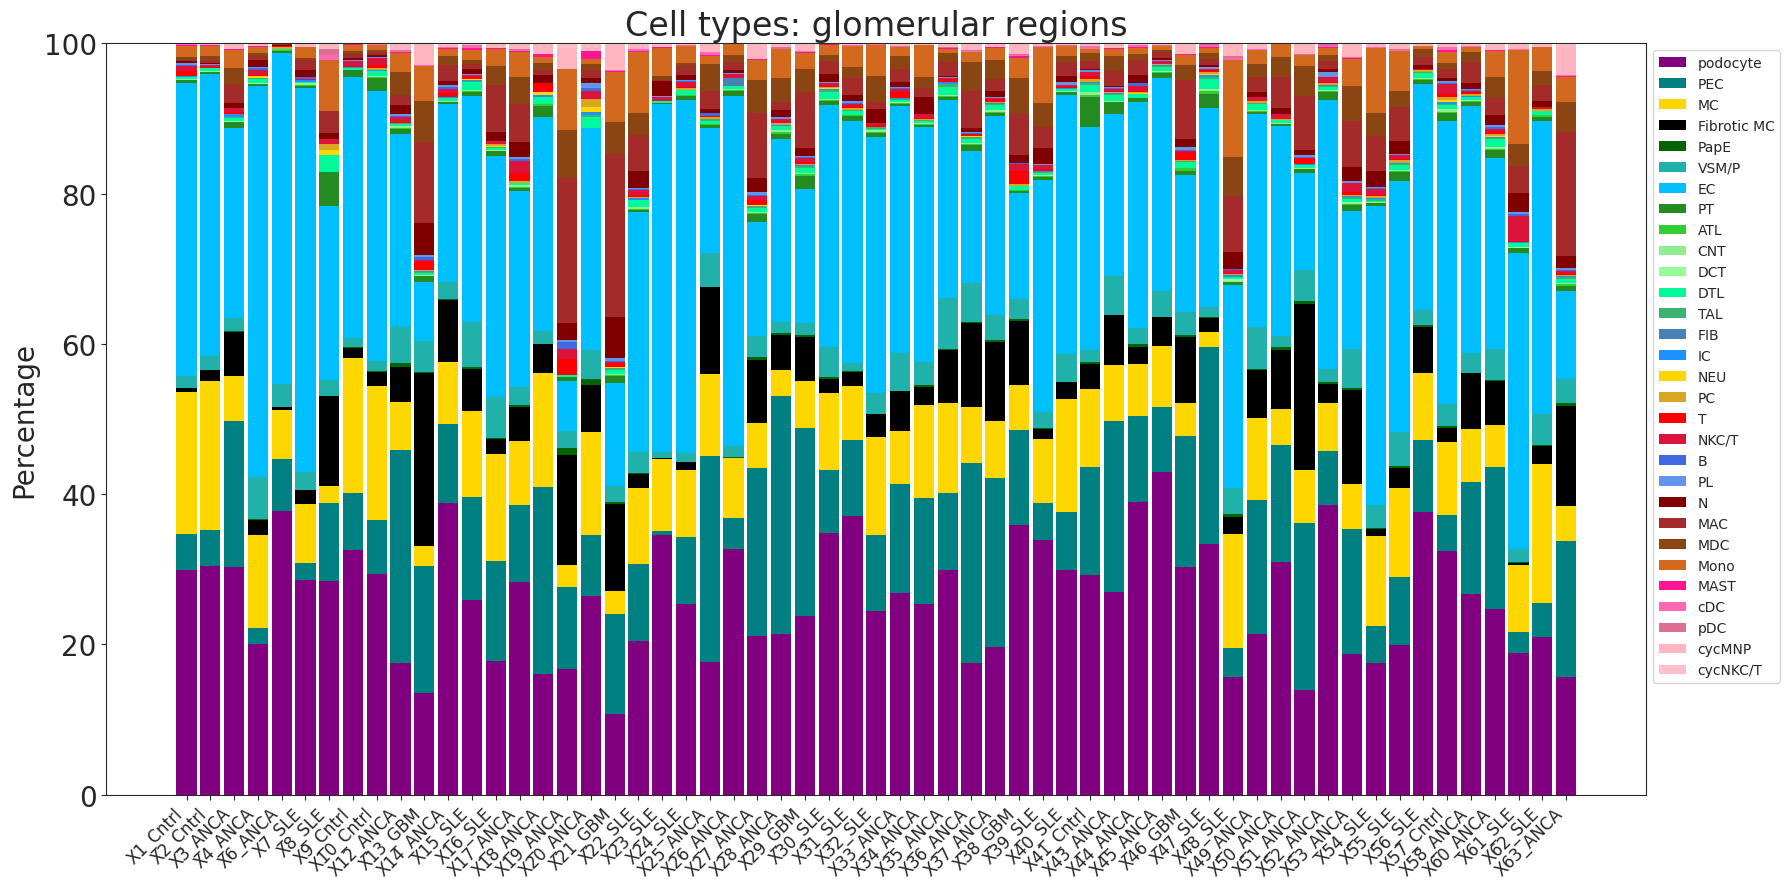

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sccoda.util import data_visualization as viz

# Extract the colors from adata
colors = adata.uns["celltype_l1_colors"]

# Convert the list of colors to a Matplotlib colormap
colormap = ListedColormap(colors)

plt.rcParams['figure.figsize'] = [18, 9]
viz.stacked_barplot(data=data_Xen, feature_name="Patient_Sample_ID_col", cmap=colormap)

# Customize fonts and plot
title_fontsize = 24
label_fontsize = 20
#tick_fontsize = 10
xtick_fontsize = 12
ytick_fontsize = 20
legend_fontsize = 18


plt.title('Cell types: glomerular regions', fontsize=title_fontsize)
#plt.xlabel("")  # Remove x-axis label
plt.ylabel('Percentage', fontsize=label_fontsize)
plt.xticks(rotation=45, fontsize=xtick_fontsize, ha='right', va='top')
plt.yticks(fontsize=ytick_fontsize)
#plt.legend(title='Condition', title_fontsize=legend_fontsize, fontsize=legend_fontsize, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig("./output/Barplot_CellType_Percentages_glom.png")
plt.savefig("./output/Barplot_CellType_Percentages_glom.pdf")
plt.show()

In [17]:
df_sampleXcelltypes["condition"]=df_sampleXcelltypes["Patient_Sample_ID_col"].str.split("_").str[1]

con_order=['Cntrl', 'SLE', 'ANCA', 'GBM']
df_sampleXcelltypes["condition"]=pd.Categorical(df_sampleXcelltypes["condition"], categories=con_order, ordered=True)

In [18]:
cell_type_columns = df_sampleXcelltypes.columns.difference(['Patient_Sample_ID_col', 'condition'])
df_sampleXcelltypes['Total_Cells'] = df_sampleXcelltypes[cell_type_columns].sum(axis=1)

# ## Calculate Percentages
for col in cell_type_columns:
    df_sampleXcelltypes[col] = (df_sampleXcelltypes[col] / df_sampleXcelltypes['Total_Cells'])*100


df_sampleXcelltypes_long = df_sampleXcelltypes.melt(id_vars=['Patient_Sample_ID_col', 'condition'], 
                  value_vars=cell_type_columns, 
                  var_name='Cell_Type', 
                  value_name='Percentage')

df_sampleXcelltypes_long

,Patient_Sample_ID_col,condition,Cell_Type,Percentage
0,X1_Cntrl,Cntrl,ATL,0.075735
1,X2_Cntrl,Cntrl,ATL,0.000000
2,X3_ANCA,ANCA,ATL,0.000000
3,X4_ANCA,ANCA,ATL,0.000000
4,X6_ANCA,ANCA,ATL,0.180832
...,...,...,...,...
1765,X58_ANCA,ANCA,podocyte,26.634615
1766,X60_ANCA,ANCA,podocyte,24.674761
1767,X61_SLE,SLE,podocyte,18.794326
1768,X62_SLE,SLE,podocyte,21.001757


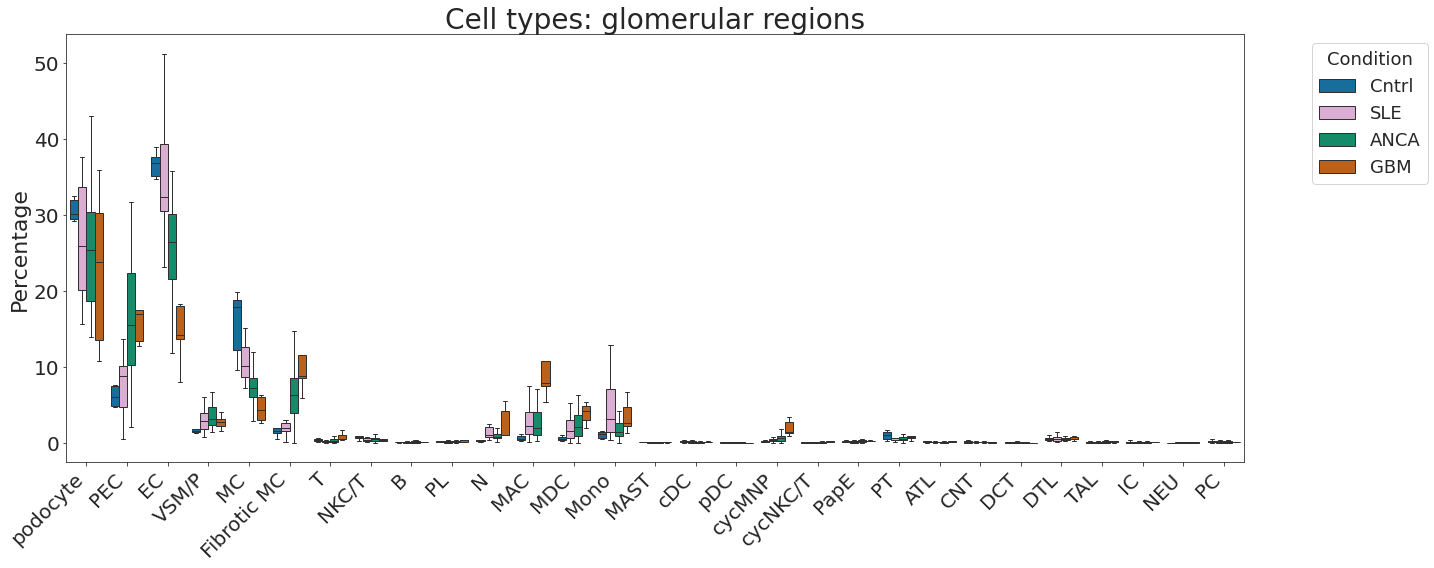

In [19]:

custom_palette = {
    'Cntrl': '#0173b2',  
    'SLE': '#E3A5D6FF',   
    'ANCA': '#029e73',   
    'GBM': '#d55e00'     
}

#cell_type_order = [
#    'podocyte', 'PEC', 'MC', 'Fibrotic MC', 'EC','VSM/P',
#    'T', 'NKC/T', 'B', 'PL', 'N', 'MAC', 'MDC', 'Mono', 'MAST', 'cDC', 'pDC', 'cycMNP', 'cycNKC/T', 
#    'PapE', 'PT', 'ATL', 'CNT', 'DCT', 'DTL', 'TAL', 'IC', 'NEU', 'PC'
#]

cell_type_order = [
    'podocyte', 'PEC', 'EC','VSM/P','MC','Fibrotic MC',
    'T', 'NKC/T', 'B', 'PL', 'N', 'MAC', 'MDC', 'Mono', 'MAST', 'cDC', 'pDC', 'cycMNP', 'cycNKC/T', 
    'PapE', 'PT', 'ATL', 'CNT', 'DCT', 'DTL', 'TAL', 'IC', 'NEU', 'PC'
]




plt.figure(figsize=(20, 8))
sns.boxplot(
    data=df_sampleXcelltypes_long, 
    x='Cell_Type', 
    y='Percentage', 
    hue='condition', 
    palette=custom_palette, 
    order=cell_type_order,
    showfliers=False  
)


title_fontsize = 28
label_fontsize = 22
tick_fontsize = 20
legend_fontsize = 18

plt.title('Cell types: glomerular regions', fontsize=title_fontsize)
plt.xlabel("") 
plt.ylabel('Percentage', fontsize=label_fontsize)
plt.xticks(rotation=45, fontsize=tick_fontsize, ha='right', va='top')
plt.yticks(fontsize=tick_fontsize)
plt.legend(title='Condition', title_fontsize=legend_fontsize, fontsize=legend_fontsize, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig("./output/Boxplot_CellType_Percentages_glom.png")
plt.savefig("./output/Boxplot_CellType_Percentages_glom.pdf")
plt.show()


## Plot without Tubular Cells

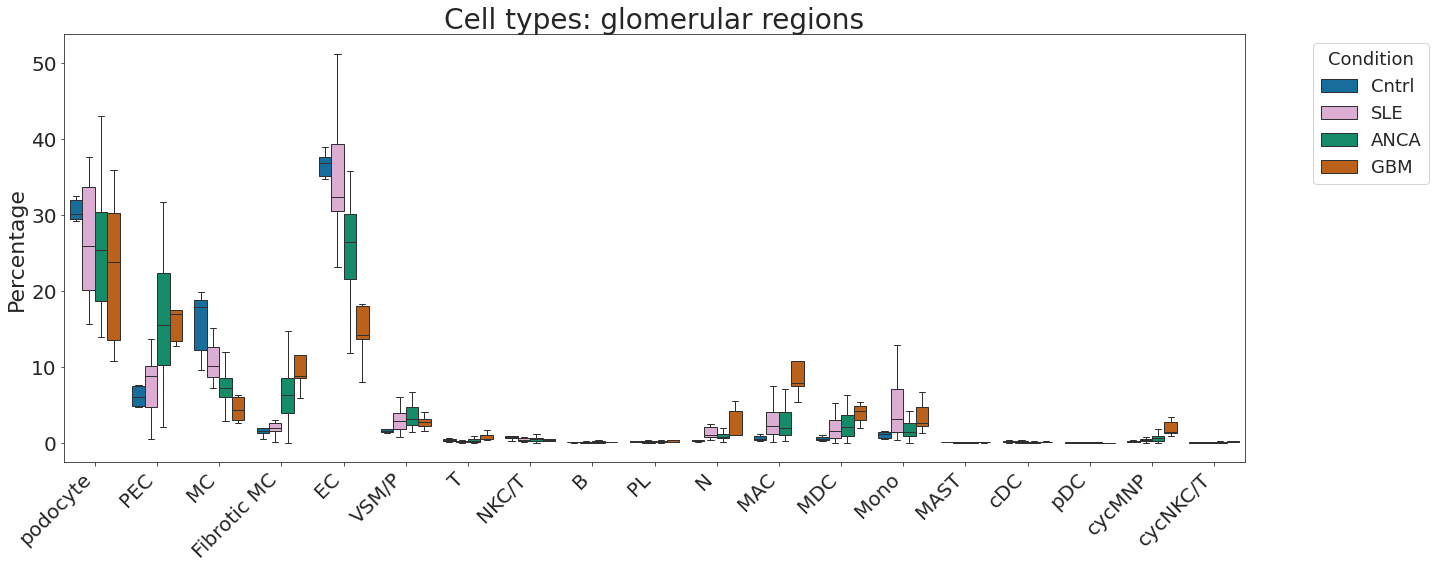

In [20]:


cell_type_order = [
    'podocyte', 'PEC', 'MC', 'Fibrotic MC', 'EC','VSM/P',
    'T', 'NKC/T', 'B', 'PL', 'N', 'MAC', 'MDC', 'Mono', 'MAST', 'cDC', 'pDC', 'cycMNP', 'cycNKC/T'
    
    #, 'PapE', 'PT', 'ATL', 'CNT', 'DCT', 'DTL', 'TAL', 'IC', 'NEU', 'PC'
]

# Step 4: Create the boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(
    data=df_sampleXcelltypes_long, 
    x='Cell_Type', 
    y='Percentage', 
    hue='condition', 
    palette=custom_palette, 
    order=cell_type_order,
    showfliers=False  # Suppress outliers
)

# Customize fonts and plot
title_fontsize = 28
label_fontsize = 22
tick_fontsize = 20
legend_fontsize = 18

plt.title('Cell types: glomerular regions', fontsize=title_fontsize)
plt.xlabel("")  
plt.ylabel('Percentage', fontsize=label_fontsize)
plt.xticks(rotation=45, fontsize=tick_fontsize, ha='right', va='top')
plt.yticks(fontsize=tick_fontsize)
plt.legend(title='Condition', title_fontsize=legend_fontsize, fontsize=legend_fontsize, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig("./output/Boxplot_CellType_Percentages_glom_NoTubules.png")
plt.savefig("./output/Boxplot_CellType_Percentages_glom_NoTubules.pdf")
plt.show()


In [21]:
df_sampleXcelltypes_long

,Patient_Sample_ID_col,condition,Cell_Type,Percentage
0,X1_Cntrl,Cntrl,ATL,0.075735
1,X2_Cntrl,Cntrl,ATL,0.000000
2,X3_ANCA,ANCA,ATL,0.000000
3,X4_ANCA,ANCA,ATL,0.000000
4,X6_ANCA,ANCA,ATL,0.180832
...,...,...,...,...
1765,X58_ANCA,ANCA,podocyte,26.634615
1766,X60_ANCA,ANCA,podocyte,24.674761
1767,X61_SLE,SLE,podocyte,18.794326
1768,X62_SLE,SLE,podocyte,21.001757


In [22]:
median_Percentage = df_sampleXcelltypes_long.groupby(['condition', 'Cell_Type'])['Percentage'].median().reset_index()


In [23]:
median_Percentage.to_csv('./output/median_Percentage_celltype_GLOM.csv')

In [24]:
filtered_df = median_Percentage[median_Percentage['Cell_Type'] == 'podocyte']
#filtered_df['perc']=filtered_df.Percentage*100
filtered_df

,condition,Cell_Type,Percentage
29,Cntrl,podocyte,30.142759
59,SLE,podocyte,25.925926
89,ANCA,podocyte,25.349198
119,GBM,podocyte,23.817713
